## <span style="color:blue">  Laboratorio di Simulazione Numerica - Esercitazione 06</span>

In questa esercitazione il primo passo è stato completare il codice che ci è stato fornito nell'Esercitazione 04 per simulare un **modello di Ising 1D** con l'**algoritmo di campionamento di Gibbs** per campionare il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$.

Il **modello di Ising** è un modello matematico che viene utilizzato per descrivere il comportamento dei sistemi di spin in un reticolo. Nel modello 1D i siti sono disposti in una linea retta e ad ogni sito $i$ del reticolo è associato uno spin $s_i$ che può assumere solo due valori: $+1$ o $-1$. L'Hamiltoniana per un sistema di $N$ spin che interagiscono solo con i loro vicini immediati è data da (assumendo unità tali per cui $\mu_B=1$ e $k_B=1$):

$$
H = -J\sum_{i=1}^N s_i s_{i+1} - \frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

con forza di interazione $J>0$ (modello ferromagnetico), campo magnetico esterno $h$ e con l'assunzione $s_{N+1}=s_1$.
La funzione di partizione per $N$ spin è:

$$
Z = \sum_{\{ s_i \}} \exp \left( -\beta H\right)
$$

con $\beta=\frac{1}{k_B T} = \frac{1}{T}$.

L'**algoritmo di campionamento di Gibbs** viene utilizzato per generare campioni da una distribuzione di probabilità congiunta complessa, quando è difficile campionare direttamente da essa; invece di campionare direttamente dalla distribuzione congiunta, il campionamento di Gibbs genera campioni campionando successivamente da distribuzioni condizionali più semplici. Supponiamo di voler campionare da una distribuzione congiunta $P(X_1, X_2, ..., X_N):$
 - Inizializzo i valori di tutte le variabili $X_1, X_2, ..., X_N$
 - Itero attraverso i seguenti passi per un certo numero di iterazioni;
 
    per $i=1$ a $N$:
   
   $$
   X_{i}^{t+1} \sim P(X_i|X_{1}^{t+1}, ..., X_{i-1}^{t+1},X_{i+1}^{t}, ..., X_{N}^{t})
   $$
   
   In altre parole, per ogni variabile $X_i$, campiona un nuovo valore da una distribuzione condizionale che tiene conto dei valori correnti delle altre variabili
 - Ripeto per un gran numero di iterazioni fino a quando i campioni generati iniziano a riflettere la distribuzione desiderata

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats

/home/andrea/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_1 = np.loadtxt("nsl_simulator/NSL_SIMULATOR/OUTPUT/equilib_metr.dat", skiprows=1)
data_2 = np.loadtxt("nsl_simulator/NSL_SIMULATOR/OUTPUT/equilib_gibbs.dat", skiprows=1)

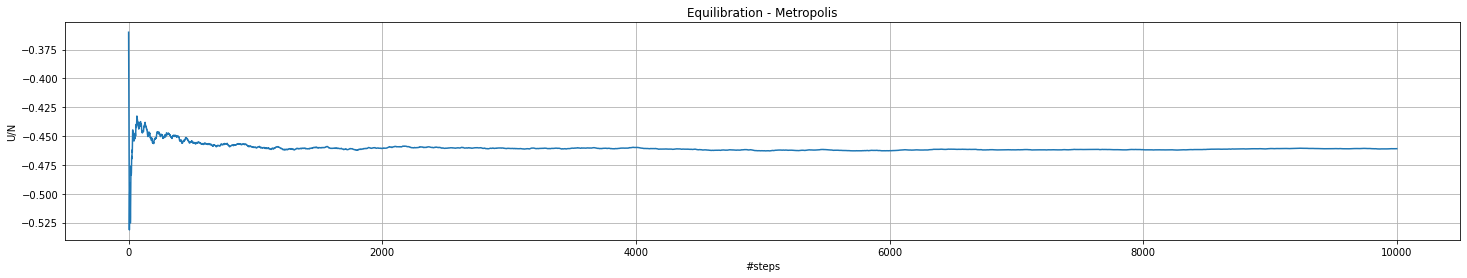

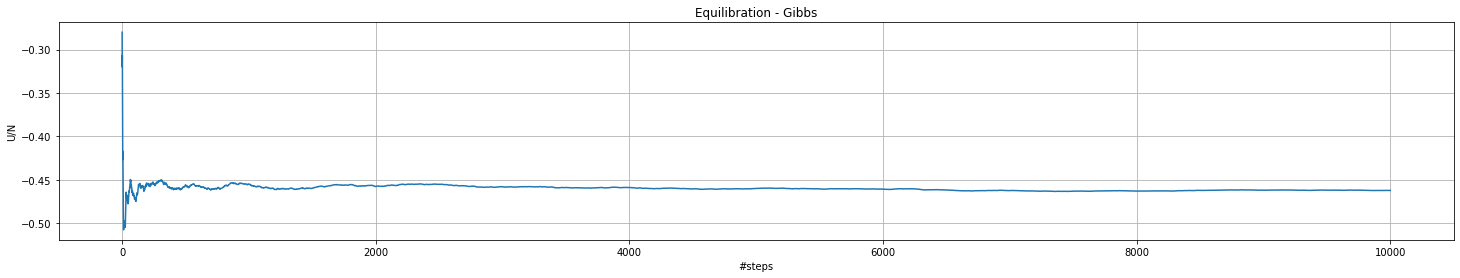

In [3]:
dim=10000
x = np.arange(dim)
plt.figure(figsize=(25, 4))
plt.plot(x,data_1[:, 2])
plt.xlabel('#steps')
plt.ylabel('U/N')
plt.title('Equilibration - Metropolis')
plt.grid(True)
plt.show()

plt.figure(figsize=(25, 4))
plt.plot(x,data_2[:, 2])
plt.xlabel('#steps')
plt.ylabel('U/N')
plt.title('Equilibration - Gibbs')
plt.grid(True)
plt.show()

L'obiettivo dell'esercitazione è calcolare, in funzione di $T$ nel range $[0.5,2.0]$ per un sistema di $N=50$ spin con $J=1$:

In [4]:
J = 1.0
h = 0.02
Ns = 50

x = [2.0, 1.75, 1.5, 1.25, 1.0, 0.75, 0.5]

l'**energia interna** per spin (con $h=0$):   $U(N,T) = \langle H \rangle_{h=0}$

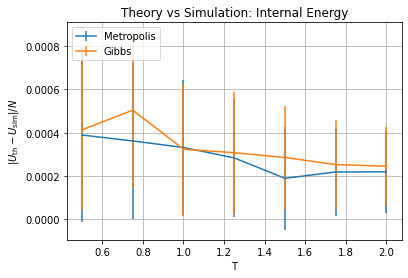

In [5]:
U_metro = [-0.462337, -0.516627, -0.582973, -0.664321, -0.761927, -0.870689, -0.974533]
eU_metro = [0.000189741, 0.000205132, 0.000238134, 0.000272106, 0.000312042, 0.000359912, 0.000403187]
U_gibbs = [-0.462363, -0.516661, -0.583069, -0.664345, -0.761919, -0.870831, -0.974557]
eU_gibbs = [0.000182852, 0.000204434, 0.000237503, 0.000280856, 0.000307548, 0.000359601, 0.000370234]

U_M = [None] * len(x)
U_G = [None] * len(x)
for i in range (len(x)):
    th = np.tanh(J/x[i])
    thN= th**Ns
    ch = 1/th
    e = -J*( th + ch*thN )/( 1 + thN )
    U_M[i] = abs(e-U_metro[i])
    U_G[i] = abs(e-U_gibbs[i])
    
plt.errorbar(x, U_M, yerr=eU_metro, label='Metropolis')
plt.errorbar(x, U_G, yerr=eU_gibbs, label='Gibbs')
plt.xlabel('T')
plt.ylabel(r'$|U_{\mathrm{th}} - U_{\mathrm{sim}}|/N$')
plt.title('Theory vs Simulation: Internal Energy')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

il **calore specifico** (con $h=0$):   $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$

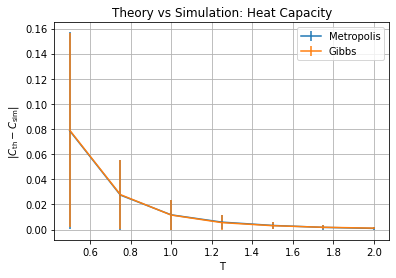

In [6]:
C_metro = [0.195726, 0.237752, 0.290253, 0.351917, 0.40831, 0.410198, 0.250738]
eC_metro = [0.00102095, 0.00171092, 0.00300853, 0.00569489, 0.0118615, 0.0276591, 0.0783379]
C_gibbs = [0.195515, 0.237675, 0.290442, 0.3523, 0.408457, 0.409851, 0.250372]
eC_gibbs = [0.00101454, 0.00169994, 0.00299888, 0.00572814, 0.0118544, 0.0277209, 0.0773915]

C_M = [None] * len(x)
C_G = [None] * len(x)
for i in range (len(x)):
    beta = 1/x[i]
    th = np.tanh(J/x[i])
    thN= th**Ns
    ch = 1/th
    heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
    C_M[i] = abs(heat-C_metro[i])
    C_G[i] = abs(heat-C_gibbs[i])
    
plt.errorbar(x, C_M, yerr=eC_metro, label='Metropolis')
plt.errorbar(x, C_G, yerr=eC_gibbs, label='Gibbs')
plt.xlabel('T')
plt.ylabel(r'$|C_{\mathrm{th}} - C_{\mathrm{sim}}|$')
plt.title('Theory vs Simulation: Heat Capacity')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

la **suscettività magnetica** (con $h=0$):   $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$

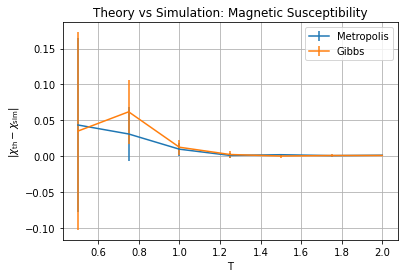

In [7]:
X_metro = [1.36043, 1.79258, 2.52712, 3.9634, 7.39873, 19.1837, 79.0955]
eX_metro = [0.000793972, 0.00108766, 0.00165028, 0.00379534, 0.00886829, 0.0374856, 0.120872]
X_gibbs = [1.36007, 1.79272, 2.52894, 3.96469, 7.40147, 19.2146, 79.087]
eX_gibbs = [0.00100818, 0.00145342, 0.00245659, 0.00424097, 0.0105397, 0.0445254, 0.137789]

X_M = [None] * len(x)
X_G = [None] * len(x)
for i in range (len(x)):
    beta = 1/x[i]
    th = np.tanh(J/x[i])
    thN= th**Ns
    ch = 1/th
    X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    X_M[i] = abs(X-X_metro[i])
    X_G[i] = abs(X-X_gibbs[i])
    
plt.errorbar(x, X_M, yerr=eX_metro, label='Metropolis')
plt.errorbar(x, X_G, yerr=eX_gibbs, label='Gibbs')
plt.xlabel('T')
plt.ylabel(r'$|\chi_{\mathrm{th}} - \chi_{\mathrm{sim}}|$')
plt.title('Theory vs Simulation: Magnetic Susceptibility')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

la **magnetizzazione** (con $h\not=0$):   $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

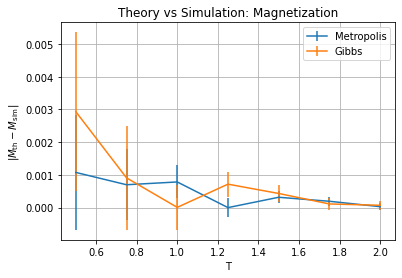

In [8]:
M_metro = [0.0272024, 0.0356206, 0.0508354, 0.0790049, 0.146987, 0.357226, 0.888272]
eM_metro = [0.000110508, 0.000140162, 0.00018791, 0.000291689, 0.000504376, 0.00109251, 0.0017523]
M_gibbs = [0.0271017, 0.0357023, 0.0500869, 0.0782871, 0.146195, 0.358835, 0.890129]
eM_gibbs = [0.000145066, 0.000175828, 0.000254996, 0.00038502, 0.000688304, 0.00159085, 0.00242647]

M_M = [None] * len(x)
M_G = [None] * len(x)
for i in range (len(x)):
    b = 1/x[i]
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    M_M[i] = abs(M-M_metro[i])
    M_G[i] = abs(M-M_gibbs[i])
    
plt.errorbar(x, M_M, yerr=eM_metro, label='Metropolis')
plt.errorbar(x, M_G, yerr=eM_gibbs, label='Gibbs')
plt.xlabel('T')
plt.ylabel(r'$|M_{\mathrm{th}} - M_{\mathrm{sim}}|$')
plt.title('Theory vs Simulation: Magnetization')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()